In [17]:
import numpy as np
import keras
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from preprocess_dataset import standardised_X, dummy_Y

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [23]:
from sklearn.metrics import confusion_matrix

In [8]:
def create_baseline():
    # create the model
    model = Sequential()
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
model = create_baseline()
history = model.fit(standardised_X, dummy_Y, validation_split = 0.1, epochs = 30)

Train on 18000 samples, validate on 2000 samples
Epoch 1/30
18000/18000 [==============================] - 1s 64us/step - loss: 0.9445 - acc: 0.7119 - val_loss: 0.5104 - val_acc: 0.9405
Epoch 2/30
18000/18000 [==============================] - 1s 44us/step - loss: 0.4607 - acc: 0.8076 - val_loss: 0.4584 - val_acc: 0.9405
Epoch 3/30
18000/18000 [==============================] - 1s 42us/step - loss: 0.4443 - acc: 0.8076 - val_loss: 0.4049 - val_acc: 0.9405
Epoch 4/30
18000/18000 [==============================] - 1s 52us/step - loss: 0.4406 - acc: 0.8074 - val_loss: 0.4126 - val_acc: 0.9405
Epoch 5/30
18000/18000 [==============================] - 1s 45us/step - loss: 0.4381 - acc: 0.8076 - val_loss: 0.4235 - val_acc: 0.9405
Epoch 6/30
18000/18000 [==============================] - 1s 51us/step - loss: 0.4363 - acc: 0.8080 - val_loss: 0.4028 - val_acc: 0.9405
Epoch 7/30
18000/18000 [==============================] - 1s 45us/step - loss: 0.4352 - acc: 0.8081 - val_loss: 0.4026 - val_acc:

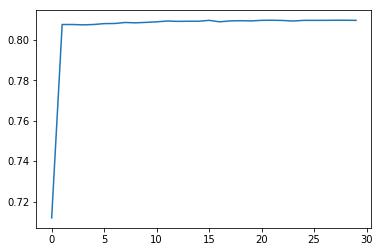

In [10]:
plt.plot(history.history['acc'])

In [11]:
model.get_weights()

[array([[-2.17864364e-01,  3.73477191e-01, -3.28232557e-01,
         -7.99530625e-01, -3.48172933e-01,  3.66916567e-01,
          7.28874683e-01, -5.27548015e-01],
        [ 1.06335187e+00, -3.81444156e-01,  5.65826356e-01,
          7.36901641e-01, -1.66946903e-01, -2.11889461e-01,
          1.30934441e+00,  1.54216871e-01],
        [-1.01468734e-01,  2.63034105e-01, -9.16932747e-02,
          5.75637780e-02,  1.64763778e-02,  2.26021633e-01,
         -9.34196040e-02, -1.55046254e-01],
        [ 5.68412170e-02,  9.70565900e-02, -2.33682171e-01,
         -1.18441835e-01, -9.30494070e-02, -3.92565578e-02,
          9.44895223e-02, -1.33723140e-01],
        [ 6.11762643e-01, -7.72627890e-01,  9.75707531e-01,
         -3.18577021e-01, -6.77578926e-01, -7.72944629e-01,
          1.32531136e-01,  3.76216143e-01],
        [-7.12680399e-01,  2.13321537e-01, -4.27105844e-01,
          9.80944395e-01,  7.02875793e-01,  1.23022065e-01,
         -5.52768052e-01, -2.79674474e-02],
        [-8.2705

In [12]:
predict = model.predict(standardised_X, verbose=1)

20000/20000 [==============================] - 0s 14us/step


In [18]:
predict_new = np.zeros_like(predict)
predict_new[np.arange(len(predict)), predict.argmax(1)] = 1
print(predict_new)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [20]:
count1 = [0]*5
count2=0

In [21]:
for prediction_new in predict_new:
    count2=count2+1
    if(prediction_new[0] == 1):
        count1[0]+=1
    elif(prediction_new[1] == 1):
        count1[1]+=1
    elif(prediction_new[2] == 1):
        count1[2]+=1
    elif(prediction_new[3] == 1):
        count1[3]+=1
    elif(prediction_new[4] == 1):
        count1[4]+=1

In [22]:
print(count1)
print(count2)

[3810, 7144, 4106, 1311, 3629]
20000


In [39]:
y_true = []
y_pred = []
count = 0

In [40]:
for true_vector in dummy_Y:
    count+=1
    if(true_vector[0] == 1):
        y_true.append('a')
    elif(true_vector[1] == 1):
        y_true.append('b')
    elif(true_vector[2] == 1):
        y_true.append('c')
    elif(true_vector[3] == 1):
        y_true.append('d')
    elif(true_vector[4] == 1):
        y_true.append('e')

In [41]:
for true_vector in predict_new:
    if(true_vector[0] == 1):
        y_pred.append('a')
    elif(true_vector[1] == 1):
        y_pred.append('b')
    elif(true_vector[2] == 1):
        y_pred.append('c')
    elif(true_vector[3] == 1):
        y_pred.append('d')
    elif(true_vector[4] == 1):
        y_pred.append('e')

In [42]:
print(count)
print(len(y_true))
print(len(y_pred))

20000
20000
20000


In [43]:
confusion_matrix(y_true, y_pred)

array([[3783,    0,  217,    0,    0],
       [   4, 3977,    2,   17,    0],
       [   0,  230, 3770,    0,    0],
       [  23, 2566,  117, 1294,    0],
       [   0,  371,    0,    0, 3629]])